Este archivo realiza una ingesta y limpieza de datos de un archivo ".csv" descargado de la página Kaggle.Trata de buques comerciales, en los cuales se indica, la compania a la que pertenecen, nombre,año de construcción,capacidad interna,capacidad de carga, eslora y manga (largo y ancho).

In [58]:
import pandas as pd

df=pd.read_csv("C:/Users/Adri/Desktop/PG/Python/complemetarios/DataSet/Ship_Uncleaned.csv", sep=",")

In [2]:
# Se imprime las primeras 10 filas
df.head(10)

,Company_Name,ship_name,built_year,gt,dwt,size
0,PRELUDE,Offshore Support Vessel,2017,499167,394330,489 / 74
1,PRELUDE,Offshore Support Vessel,2017,499167,394330,489 / 74
2,PRELUDE,Offshore Support Vessel,2017,499167,394330,489 / 74
3,PRELUDE,Offshore Support Vessel,2017,499167,394330,489 / 74
4,PRELUDE,Offshore Support Vessel,2017,499167,394330,489 / 74
5,PRELUDE,Offshore Support Vessel,2017,499167,394330,489 / 74
6,PRELUDE,Offshore Support Vessel,2017,499167,394330,489 / 74
7,PRELUDE,Offshore Support Vessel,2017,499167,394330,489 / 74
8,PRELUDE,Offshore Support Vessel,2017,499167,394330,489 / 74
9,PRELUDE,Offshore Support Vessel,2017,499167,394330,489 / 74


In [3]:
# Se imprime las ultimas 10 filas
df.tail(10)

,Company_Name,ship_name,built_year,gt,dwt,size
3990,BRAVE SAILOR,Bulk Carrier,2011,89991,176283,292 / 45
3991,BRAVE SAILOR,Bulk Carrier,2011,89991,176283,292 / 45
3992,BRAVE SAILOR,Bulk Carrier,2011,89991,176283,292 / 45
3993,BRAVE SAILOR,Bulk Carrier,2011,89991,176283,292 / 45
3994,BRAVE SAILOR,Bulk Carrier,2011,89991,176283,292 / 45
3995,BRAVE SAILOR,Bulk Carrier,2011,89991,176283,292 / 45
3996,BRAVE SAILOR,Bulk Carrier,2011,89991,176283,292 / 45
3997,BRAVE SAILOR,Bulk Carrier,2011,89991,176283,292 / 45
3998,BRAVE SAILOR,Bulk Carrier,2011,89991,176283,292 / 45
3999,BRAVE SAILOR,Bulk Carrier,2011,89991,176283,292 / 45


In [2]:
# Se realiza un shape para conocer número de filas y columnas

df.shape

(4000, 6)

In [7]:
# Se verifica el tipo de estructura 
type(df)

pandas.core.frame.DataFrame

In [8]:
# verificación de valores mising (registros vacios),(No hay registros vacios)
df.count()

Company_Name    4000
ship_name       4000
built_year      4000
gt              4000
dwt             4000
size            4000
dtype: int64

In [10]:
# impresion para conocer nombres de columnas
print(df.columns)

Index(['Company_Name', 'ship_name', 'built_year', 'gt', 'dwt', 'size'], dtype='object')


In [12]:
# impresion de indices 
print(df.index)

RangeIndex(start=0, stop=4000, step=1)


In [13]:
# se chequea información

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Company_Name  4000 non-null   object
 1   ship_name     4000 non-null   object
 2   built_year    4000 non-null   int64 
 3   gt            4000 non-null   int64 
 4   dwt           4000 non-null   int64 
 5   size          4000 non-null   object
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [59]:
# limpieza de datos, separo los valores de la columna size (eslora y manga) en 'large' y 'width'  

df[['large', 'width']] = df['size'].str.split('/', expand=True)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Company_Name  4000 non-null   object
 1   ship_name     4000 non-null   object
 2   built_year    4000 non-null   int64 
 3   gt            4000 non-null   int64 
 4   dwt           4000 non-null   int64 
 5   size          4000 non-null   object
 6   large         4000 non-null   object
 7   width         4000 non-null   object
dtypes: int64(3), object(5)
memory usage: 250.1+ KB


In [34]:
#Borro la columna size, ya que ahora esta separada en large y width

df.drop('size', axis = "columns", inplace = True)



In [36]:
# Chequeo columnas 
df.shape

(4000, 7)

In [38]:
# verifico columnas y missings
df.count()

Company_Name    4000
ship_name       4000
built_year      4000
gt              4000
dwt             4000
large           4000
width           4000
dtype: int64

In [50]:
# Convierto las columnas large y width en int

df['large']=df['large'].astype(int)
df['width']=df['width'].astype(int)


In [51]:
# Verificación de tipos de datos

df.dtypes

Company_Name    object
ship_name       object
built_year       int64
gt               int64
dwt              int64
large            int32
width            int32
dtype: object

In [52]:
# Obtengo los 10 primeros buques con capacidad de carga mensual (Dead Weight Tonnage ) mayor a 390.000 toneladas

df[df['dwt']> 390000].head(10)

,Company_Name,ship_name,built_year,gt,dwt,large,width
0,PRELUDE,Offshore Support Vessel,2017,499167,394330,489,74
1,PRELUDE,Offshore Support Vessel,2017,499167,394330,489,74
2,PRELUDE,Offshore Support Vessel,2017,499167,394330,489,74
3,PRELUDE,Offshore Support Vessel,2017,499167,394330,489,74
4,PRELUDE,Offshore Support Vessel,2017,499167,394330,489,74
5,PRELUDE,Offshore Support Vessel,2017,499167,394330,489,74
6,PRELUDE,Offshore Support Vessel,2017,499167,394330,489,74
7,PRELUDE,Offshore Support Vessel,2017,499167,394330,489,74
8,PRELUDE,Offshore Support Vessel,2017,499167,394330,489,74
9,PRELUDE,Offshore Support Vessel,2017,499167,394330,489,74


In [53]:
#Muestro los 10 buques con mas capacidad de carga 

df.nlargest(10,'dwt')

,Company_Name,ship_name,built_year,gt,dwt,large,width
160,SAHAM MAX,Bulk Carrier,2013,201705,400694,360,65
161,SAHAM MAX,Bulk Carrier,2013,201705,400694,360,65
162,SAHAM MAX,Bulk Carrier,2013,201705,400694,360,65
163,SAHAM MAX,Bulk Carrier,2013,201705,400694,360,65
164,SAHAM MAX,Bulk Carrier,2013,201705,400694,360,65
165,SAHAM MAX,Bulk Carrier,2013,201705,400694,360,65
166,SAHAM MAX,Bulk Carrier,2013,201705,400694,360,65
167,SAHAM MAX,Bulk Carrier,2013,201705,400694,360,65
168,SAHAM MAX,Bulk Carrier,2013,201705,400694,360,65
169,SAHAM MAX,Bulk Carrier,2013,201705,400694,360,65


In [54]:
# Imprimo los 10 Barcos con mayor capacidad interna total (Gross Tonnage)

df.nlargest(10,'large')

,Company_Name,ship_name,built_year,gt,dwt,large,width
0,PRELUDE,Offshore Support Vessel,2017,499167,394330,489,74
1,PRELUDE,Offshore Support Vessel,2017,499167,394330,489,74
2,PRELUDE,Offshore Support Vessel,2017,499167,394330,489,74
3,PRELUDE,Offshore Support Vessel,2017,499167,394330,489,74
4,PRELUDE,Offshore Support Vessel,2017,499167,394330,489,74
5,PRELUDE,Offshore Support Vessel,2017,499167,394330,489,74
6,PRELUDE,Offshore Support Vessel,2017,499167,394330,489,74
7,PRELUDE,Offshore Support Vessel,2017,499167,394330,489,74
8,PRELUDE,Offshore Support Vessel,2017,499167,394330,489,74
9,PRELUDE,Offshore Support Vessel,2017,499167,394330,489,74


<Axes: >

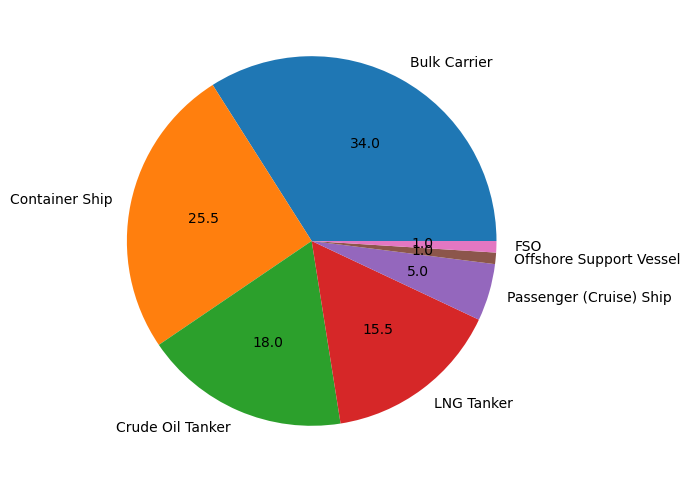

In [150]:
# Se crea un gráfico con los modelos de estos buqes

df['ship_name'].value_counts().plot(kind='pie',autopct='%.1f',label="",fontsize=10,figsize=(8,6))      

<Axes: >

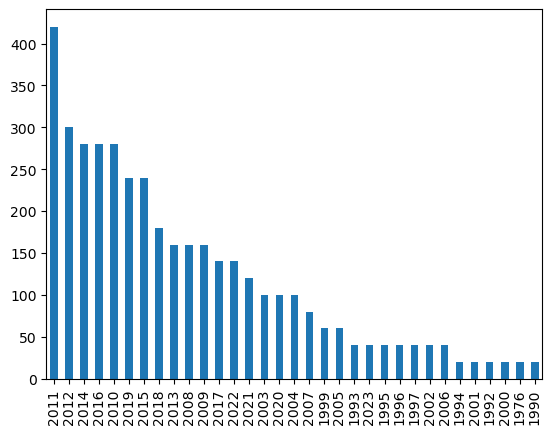

In [106]:
# Se crea un gráfico con los años de contrucción de los buqes

df['built_year'].value_counts().plot(kind='bar')

In [151]:
# Eda basico 
#cantidad,mediana,desviación estandar,cuartiles(25,50,75),maximo

df.describe().T

,count,mean,std,min,25%,50%,75%,max
built_year,4000.0,2011.66,7.165699,1976.0,2009.00,2012.0,2016.00,2023.0
gt,4000.0,128046.05,43045.106352,89991.0,94761.75,113883.0,155140.50,499167.0
dwt,4000.0,179971.46,88786.478168,7900.0,106146.25,179217.5,231111.75,400694.0
